In [42]:
from utils import *                          
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd                               

def show_a_digit(arr, index):
    this_digit = arr.iloc[index] 
    this_digit_image = this_digit.values.reshape(28,28)
    plt.imshow(this_digit_image, cmap='binary')
    plt.axis('off')
                                             

In [2]:
#Only run once (to get data)                 
mnist_data = fetch_openml('mnist_784', version=1, as_frame=True)               
X = mnist_data['data']  
Y = mnist_data['target']     # X_train, Y_train, X_test, Y_test = X[:6


In [3]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [4]:
# train_index, test_index=  sss.split(X, Y)
i = 0
for train_index, test_index in sss.split(X, Y):
    X_strat_train_set = X.loc[train_index]
    X_strat_test_set =  X.loc[test_index]
    Y_strat_train_set = Y.loc[train_index]
    Y_strat_test_set = Y.loc[test_index]
    i = i +1

    
print(i)

1


In [5]:
 knn_clf = KNeighborsClassifier(n_jobs=2)

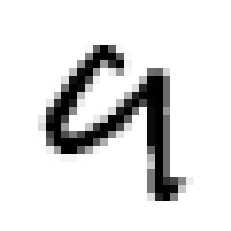

In [6]:
show_a_digit(X_strat_train_set, 3)


In [7]:
knn_clf.fit(X_strat_train_set, Y_strat_train_set)

KNeighborsClassifier(n_jobs=2)

In [8]:
knn_clf.predict([X_strat_train_set.iloc[3]])

array(['9'], dtype=object)

In [11]:
param_grid = [ {'n_neighbors':[1,3,5,7,13], 'weights': ['uniform', 'distance']}]

In [12]:
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring= 'accuracy', n_jobs=2)

In [13]:
grid_search.fit(X_strat_train_set, Y_strat_train_set)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=2), n_jobs=2,
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 13],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [15]:
grid_search.best_params_
#best param was {'n_neighbors': 5, 'weights': 'distance'}

{'n_neighbors': 5, 'weights': 'distance'}

In [37]:
bestKNN = grid_search.best_estimator_

In [39]:
bestKNN.fit(X_strat_train_set, Y_strat_train_set)

KNeighborsClassifier(n_jobs=2, weights='distance')

In [40]:
#getting accuray on test set:
X_pred = bestKNN.predict(X_strat_test_set)

In [43]:
accuracy_score(X_pred, Y_strat_test_set)

0.9708571428571429